# Recomendation using Collaborative Filtering

is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

we try to use embedding and also build neural network for a model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model


In [2]:
from google.colab import files
uploaded = files.upload()

Saving tourism_rating.csv to tourism_rating.csv


## upload data

In [3]:
tourism = pd.read_csv('tourism_rating.csv')

In [4]:
tourism.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [5]:
tourism.shape

(10000, 3)

In [6]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


## split data for training 80% and for test 20%

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tourism, test_size=0.2, random_state=42)

In [8]:
train.head()

,User_Id,Place_Id,Place_Ratings
9254,278,262,3
1561,49,251,2
1670,52,52,2
6087,183,385,1
6669,200,258,5


In [9]:
test.head()

,User_Id,Place_Id,Place_Ratings
6252,188,207,3
4684,142,268,2
1731,54,103,3
4742,144,119,3
4521,138,288,5


In [10]:
n_users = len(tourism.User_Id.unique())
n_users

300

In [11]:
n_tourisms = len(tourism.Place_Id.unique())
n_tourisms

437

## Nural Net

Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems

In [12]:
# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')

In [13]:
# creating book embedding path
#tourism_input = Input(shape=[1], name="Tourism-Input")
#tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
#tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
#user_input = Input(shape=[1], name="User-Input")
#user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
#user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
#conc = Concatenate()([tourism_vec, user_vec])

#model2 = tf.keras.Sequential([
#          Input(shape=[1], name="Tourism-Input"),
#          Embedding(n_tourisms+1, 5, name="Tourism-Embedding"),
#          #Flatten(name="Flatten-Tourism"),
#          #Input(shape=[1], name="User-Input"),
#          #Embedding(n_users+1, 5, name="User-Embedding"),
#          Flatten(name="Flatten-Users"),
#          #Concatenate()([tourism_vec, user_vec]),
#          tf.keras.layers.Dense(128, activation='relu'),
#          tf.keras.layers.Dense(64, activation='relu'),
#          tf.keras.layers.Dense(1),
#])

#model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              optimizer=tf.keras.optimizers.Adam(1e-4),
#              metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tourism-Input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Tourism-Embedding (Embedding)   (None, 1, 5)         2190        Tourism-Input[0][0]              
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         1505        User-Input[0][0]                 
______________________________________________________________________________________________

In [15]:
#model2.summary()

In [16]:
#from keras.models import load_model

#if os.path.exists('regression_model2.h5'):
    #model2 = load_model('regression_model2.h5')
#else:
history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20, verbose=1)
    #model2.save('regression_model2.h5')


Epoch 1/20
250/250 [==============================] - 15s 2ms/step - loss: 5.1121
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 1.8607
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 1.8576
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7523
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7651
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7450
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7389
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 1.6735
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7279
Epoch 10/20
250/250 [==============================] - 0s 1ms/step - loss: 1.7061
Epoch 11/20
250/250 [==============================] - 0s 2ms/step - loss: 1.6507
Epoch 12/20
250/250 [==============================] - 0s 2ms/step - loss: 1.5701
Epoch 13/20
250/250 [===

Text(0, 0.5, 'Training Error')

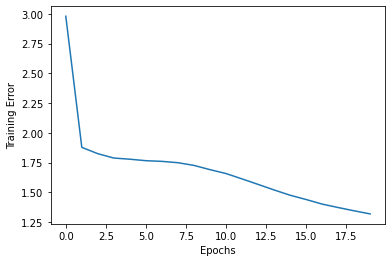

In [17]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [18]:
model.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

63/63 [==============================] - 1s 1ms/step - loss: 2.4267


2.426720142364502

In [19]:
model.save('recommendation_rating_model.h5')

In [20]:
id_place = range(1,20)

In [21]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(tourism.Place_Id)))
tourism_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
id_user = 3

In [23]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Predict

In [25]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

array([138,  96, 415, 398, 321, 410,  89, 431,  82,  51])

In [26]:
# print predicted scores
predictions[recommended_tourism_ids]

array([5.310417 , 5.201168 , 5.105817 , 4.9564457, 4.9540906, 4.8568134,
       4.8300843, 4.823816 , 4.7820415, 4.74625  ], dtype=float32)